<a href="https://colab.research.google.com/github/ulises1229/Intro-ML-Python/blob/master/code/D%C3%ADa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Python y aplicaciones en Inteligencia Artificial
## Curso intersemestral enero 2022

---
### Dr. Jesús Emmanuel Solís Pérez
#### jessolisperez@gmail.com
---

# ¿Qué es Machine Learning (ML)?

Es una rama de la Inteligencia Artificial (IA) dedicada a la extracción de conocimiento a partir de datos. En este campo se intersectan la estadística, la inteligencia artificial y las ciencias computacionales. ML también es conocido como **análisis predictivo** o **aprendizaje estadístico**.

<img src="../figs/applications-of-machine-learning.png" width=440 height=280 />

## Tipos de machine learning

* **Aprendizaje Supervisado (AS).** El usuario proporciona al algoritmo entradas y salidas deseadas para que busque la forma de producir lo deseado. 

<img src="../figs/supervision-teacher.jpg" width=440 height=280 />

**Ejemplos:**

1. Identificación de los caracteres en una placa de carro
2. Diagnóstico de un tumor basado en imágenes médicas
3. Detección de actividades fraudulentas

* **Aprendizaje No Supervisado (ANS).** Sólo se conocen las entradas y se desconoce la salida. Son difíciles de entender y evaluar.

**Ejemplos:**

1. Identificar el tema en un junto de posts de Facebook, tuits o comentarios
2. Segmentación de consumidores (padres, niños, "gamers", etc.)
3. Detección de patrones de acceso anormales en un sitio web

<img src="../figs/tabla-articulo.png" width=940 height=780 />

Cada dato a analizar es una **fila** y cada propiedad que describe ese punto es una **columna**. En ML, cada fila es conocida como **muestra** y las columnas son llamadas **características**.

* **Aprendizaje Semi-Supervisado (ASS).** una porción de los datos está etiquetada y el resto no (Bobadilla,2021). Además, la muestra de los datos etiquetados es más pequeña que las que no están etiquetadas.


* **Aprendizaje por Refuerzo (AR).** Inspirado en mecanismos naturales. Recibe información del mundo real o de un entorno simulado.

Los tipos de problemas abordados por el aprendizaje _supervisado_ y _no supervisado_ son los siguientes:

|**Aprendizaje** | **Variable continua**        | **Variable categórica**|
|:--------------:|:----------------------------:|:----------------------:|
| Supervisado    | Regresión                    | Clasificación          |
| No supervisado | Reducción de dimensionalidad | Clustering             |

# Librerías necesarias y herramientas

* **Jupyter Notebook.** Entorno interactivo para coder código en un navegador. Soporta diversos lenguajes, por ejemplo: Python, Julia, R, Maxima, Octave, MATLAB.

<img src="../figs/jupyter-lang.jpg" width=740 height=580 />

* **NumPy.** Permite trabajar con arreglos multidimensionales, funciones matemáticas de alto nivel, operaciones de álgebra lineal, transformada de Fourier y generadores de números pseudo aleatorios.

In [ ]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

* **SciPy.** Colección de funciones para cómputo científico. También proporciona rutinas de álgebra lineal avanzadas, optimización de función matemática, procesamiento de señales, funciones matemáticas especiales y distribuciones estadísticas.

In [ ]:
from scipy import sparse

# Crea una matriz identidad
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

* **matplotlib.** Librería de graficación científica. Proporciona funciones para visualizar gráficas de líneas, histogramas, gráficos de dispersión, entre otros más.

Para poder graficar dentro de los Notebook de Jupyter, necesitamos la instrucción `%matplotlib notebook` y `%matplotlib inline`.

**Ejemplo:** Grafique la siguiente función

$$
 f(x) = \sin(x), \quad x\in[0,2\pi].
$$

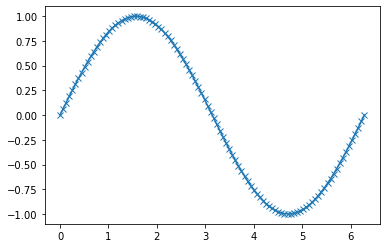

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Genera una secuencia de números de 0 a 2pi
x = np.linspace(0,2*np.pi,100)

# Crea un arreglo para la función f(x) = sin(x)
fx = np.sin(x)

# Grafica la función
plt.plot(x, fx, marker="x")

* **pandas.** biblioteca para el tratamiento y análisis de datos. Utiliza estructuras de datos llamadas *DataFrame*.

In [ ]:
import pandas as pd

# Crea un conjunto de datos simple
data = {'Nombre': ["Juan","Ana","Pedro","Claudia"],
        'Carrera': ["Ingeniería en energías renovables","Neurociencias","Tecnología","Ciencias de la tierra"],
        'Edad': [20,21,23,22]
}

data_pandas = pd.DataFrame(data)
display(data_pandas)

display(data_pandas[data_pandas.Edad > 21])

,Nombre,Carrera,Edad
0,Juan,Ingeniería en energías renovables,20
1,Ana,Neurociencias,21
2,Pedro,Tecnología,23
3,Claudia,Ciencias de la tierra,22


,Nombre,Carrera,Edad
2,Pedro,Tecnología,23
3,Claudia,Ciencias de la tierra,22


# Regresión y clasificación

Existen dos tipos de problemas de ML supervisados: **clasificación** y **regresión**. 

* **Clasificación.** El objetivo es predecir una _etiqueta clase_.
    * _Binaria_. Clasifica entre dos clases (verdadero/falso, positivo/negativo, si/no).
    * _Multiclase_. Clasifica entre dos o más clases.
    
* **Regresión.** Predecir números contínuos, _números de punto flotante_ (término de programación), o _números reales_ (término en matemáticas.)

# Generalization, Overfitting, and Underfitting
En AS, queremos construir un modelo a partir de datos de entrenamiento capaz de realizar predicciones precisas sobre nuevas. Es decir, sobre datos no conocidos (datos de prueba) que tienen las mismas características que los datos que utilizamos para entrenar al modelo.

Si un modelo es capaz de realizar predicciones precisas sobre datos nuevos, entonces el modelo puede **generalizar** de los datos de entrada a los datos de prueba.

<img src="../figs/navaja.jpg"  width=540 height=380 />

> _"La explicación más simple es la más probable, aunque no necesariamente la verdadera."_

Un error común es construir un modelo complejo para la cantidad de datos que tenemos, este error suele llevar a un **overfitting** (sobre ajuste). El sobreajuste se produce cuando un modelo es ajustado demasiado a los datos de entrenamiento. Se desempeña bien ante los datos de entrenamiento pero no generaliza a datos nuevos.

Si un modelo es muy simple, es posible que éste no pueda capturar la variabilidad de los datos y sus aspectos. A esto se le conoce como **underfitting** (desajuste).

<img src="../figs/diagrama_dispersion.png" width=540 height=380/>

# Modelos lineales
Son modelos ampliamente utilizados en la práctica y muy usados en las últimas décadas. Los modelos lineales hacen una predicción utilizando una función lineal:

$$
 \hat{y} = \beta_{0}\cdot x_{0} + \beta_{1}\cdot x_{1} + \cdots + \beta_{p}\cdot x_{p} + b,
$$
donde $x_{0}$ a $x_{p}$ denota las características, $\beta$ y $b$ los parámetros del modelo, $\hat{y}$ la predicción hecha por el modelo. Para un conjunto de datos con una sola característica está dada como sigue:

$$
 \hat{y} = \beta_{0}\cdot x_{0} + b.
$$

Aquí, $\beta_{0}$ es la pendiente y $b$ el intercepto.

## Regresión lineal (mínimos cuadrados ordinarios)
Regresión lineal o *ordinary least squares (OLS)* es el modelo más simple de regresión. Se trata de encontrar los parámetros $\beta$ y $b$ que minimicen el *MSE* entre los datos predichos y los datos reales. Es decir:

$$
 \underset{\beta_{0},\beta_{1}}{\min} \left\{ \frac{1}{N} \sum_{k=1}^{N} \left( y - \hat{y} \right)^{2} \right\},
$$
donde

$$
 \hat{y} = \beta_{0} + \beta_{1}\cdot x,
$$

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# 1. Crea el modelo de regresión lineal
m_ols = LinearRegression()

# 2. Ajusta el modelo
m_ols.fit(X = boston["data"], y = boston["target"])

# 3. Realiza predicciones sobre nuevas observaciones
m_ols_pred = m_ols.predict(boston["data"])

# 4. Se obtienen sus coeficientes
print("m_ols.coef_: {}".format(m_ols.coef_))
print("m_ols.intercept_: {}".format(m_ols.intercept_))

m_ols.coef_: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
m_ols.intercept_: 36.45948838509012


In [ ]:
boston["data"].shape

(506, 13)

In [ ]:
def mse(target,yg):
    return np.mean((target-yg)**2)

def rmse(target,yg):
    return np.sqrt(mse(target,yg))

In [ ]:
print(mse(boston["target"], m_ols_pred))
print(rmse(boston["target"], m_ols_pred))

21.894831181729202
4.679191295697281


## Evaluación de modelos de regresión

### Mean Absolute Error (MAE)
La media de las diferencias entre el target y las predicciones sin el signo. Es una métrica robusta, no varía mucho si hay valores extremos en los datos. Además, el error se interpreta con las unidades del target:

$$
 \frac{1}{N} \sum_{k=1}^{N} \mid y_{k} - \hat{y}_{k} \mid.
$$

### Mean Squared Error (MSE)
No es de fácil interpretación pues el MSE se define en unidades al cuadrado:

$$
 \frac{1}{N} \sum_{k=1}^{N} \left( y_{k} - \hat{y}_{k} \right)^{2}.
$$

### Root Mean Squared Error (RMSE)
El resultado se mide en términos del target, es decir, el RMSE tiene las mismas unidades que el target. No obstante, es sensible ante valores atípicos:

$$
 \sqrt{\frac{1}{N} \sum_{k=1}^{N} \left( y_{k} - \hat{y}_{k} \right)^{2}}.
$$

### $R^{2}$ o $R$-squared
Mide la varianza del target que es explicada por el modelo. Tiene un valor máximo de 1 (cuando el modelo explica toda la varianza):

$$
 1 - \frac{\sum_{k=1}^{N} \left( y_{k} - \hat{y}_{k} \right)^{2}}{\sum_{k=1}^{N} \left(y_{k} - \bar{y} \right)^{2}}
$$

**Nota:** No indica si el modelo explica la varianza debido a un overfitting.

### $R^{2}_{adj}$ o Adjusted $R$-squared

$$
 R^{2} - \left( \frac{p-1}{n-p} \right)\left(1 - R^{2} \right),
$$
donde $n$ es el número de observaciones y $p$ es el numero de coeficientes de regresión o parámetros en el modelo.

---
# Ejemplo 1.
¿Es posible predecir el tamaño de la cabeza de una zarigüeya a partir del tamaño total?

## Metodología

In [ ]:
# 1. Importación de la base de datos
db_possum = pd.read_csv('possum.csv')
db_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Representación gráfica
Antes de generar un modelo de regresión lineal debemos representar los datos para observar si existe una relación. Además, dicha relación debe ser cuantificada mediante un coeficiente de correlación

Text(0.5, 1.0, 'Linear regression')

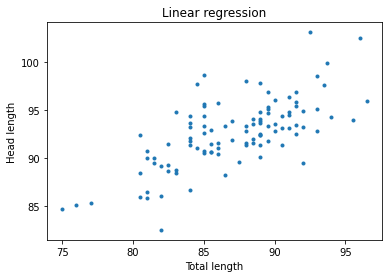

In [ ]:
plt.plot(db_possum['totlngth'],db_possum['hdlngth'],'.')
plt.xlabel("Total length")
plt.ylabel("Head length")
plt.title('Linear regression')

In [ ]:
# Correlación lineal entre las dos variables
from scipy.stats import pearsonr

corr_test = pearsonr(x = db_possum['totlngth'], y = db_possum['hdlngth'])
print("Coeficiente de Pearson: ", corr_test[0])
print("p-value: ", corr_test[1])

Coeficiente de Pearson:  0.6910936973935056
p-value:  4.680578654379385e-16


La gráfica nos muestra de que existe una tendencia lineal entre la longitud total y el tamaño de la cabeza con una intensidad alta ($R\approx 0.70$). Por lo tanto, es viable generar un modelo de regresión lineal.

In [ ]:
# 2. Creación del modelo de regresión lineal
possum_ols = LinearRegression()

# 3. Ajuste del modelo de regresión lineal
possum_ols.fit(X = np.array(db_possum['totlngth']).reshape(-1, 1), y = db_possum['hdlngth'])

# 4. Predicción del modelo ajustado
possum_ols_pred = possum_ols.predict(np.array(db_possum['totlngth']).reshape(-1, 1))

# 5. Se obtienen sus coeficientes
print("m_ols.coef_: {}".format(possum_ols.coef_))
print("m_ols.intercept_: {}".format(possum_ols.intercept_))

# 6. Evaluacion del modelo
from sklearn import metrics

results = {}
results['Results'] = {'MAE': metrics.mean_absolute_error(db_possum['hdlngth'],possum_ols_pred), 
                      'RMSE': metrics.mean_squared_error(db_possum['hdlngth'],possum_ols_pred),
                      'R2': metrics.r2_score(db_possum['hdlngth'],possum_ols_pred)}


pd.DataFrame(results)

m_ols.coef_: [0.57290128]
m_ols.intercept_: 42.70979314896378


,Results
MAE,1.972670
R2,0.477610
RMSE,6.606163


Text(0.5, 1.0, 'Linear regression')

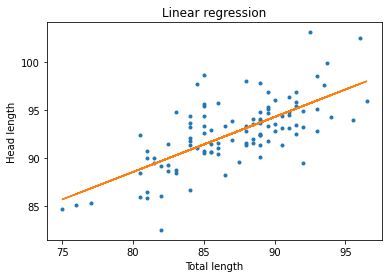

In [ ]:
%matplotlib inline
plt.plot(db_possum['totlngth'],db_possum['hdlngth'],'.')
plt.plot(db_possum['totlngth'],possum_ols_pred)
plt.xlabel("Total length")
plt.ylabel("Head length")
plt.title('Linear regression')

# Práctica en clase
¿Podemos predecir la ubicación de captura de una zarigüeya a partir de las dimensiones de su cuerpo?

---
# Ejemplo 2
Performance evaluation of ground source heat pump using linear and nonlinear regressions and artificial neural networks

_Xinjie Xu, Jinxiang Liu, Yu Wang, Jinjun Xu, Jun Bao_

## Description

* Heat exchange manner **(HEM)**
* Soil thermal conductivity, λ [W/m· °C] **(STC)**
* Vertical well depth, h [m] **(VWD)**
* Well diameter, d [mm] **(WD)**
* U-tube thickness, δ [mm] **(UT)**
* Water flow rate, G [m3/h] **(WFR)**
* Water temperature difference, Δt [°C] **(WTD)**
* Heat transfer rate, Q [W/m] **(HTR)**

In [ ]:
gs_heat_pump = pd.read_csv('ground_source_heat_pump.csv')
gs_heat_pump.head()

,HEM,STC,VWD,WD,UT,WFR,WTD,HTR
0,Release,1.41,100.0,180,3.0,1.15,4.04,53.9
1,Release,1.41,125.0,180,3.0,1.15,4.86,52.0
2,Extraction,1.41,100.0,180,3.0,1.15,3.18,42.4
3,Extraction,1.41,125.0,180,3.0,1.15,3.82,40.7
4,Release,1.46,85.0,130,2.8,1.19,4.19,66.6


## Relación entre variables
Antes de obtener un modelo lineal, es necesario estudiar la relación que existe entre las variables.

In [ ]:
# Correlación entre columnas numéricas
def fcn_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [ ]:
corr_matrix = gs_heat_pump.select_dtypes(include=['float64', 'int']).corr(method='pearson')
fcn_corr_matrix(corr_matrix).head(10)

,var_1,var_2,r,abs_r
47,HTR,WTD,0.552552,0.552552
41,WTD,HTR,0.552552,0.552552
39,WTD,WFR,-0.524291,0.524291
33,WFR,WTD,-0.524291,0.524291
9,VWD,WD,0.473210,0.473210
15,WD,VWD,0.473210,0.473210
4,STC,WFR,0.413460,0.413460
28,WFR,STC,0.413460,0.413460
12,VWD,WTD,0.318710,0.318710
36,WTD,VWD,0.318710,0.318710


<AxesSubplot:>

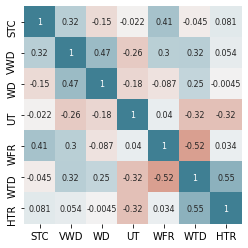

In [ ]:
import seaborn as sns

sns.heatmap(corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
)

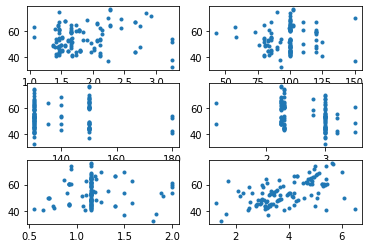

In [ ]:
plt.subplot(3,2,1)
plt.plot(gs_heat_pump['STC'],gs_heat_pump['HTR'],'.')

plt.subplot(3,2,2)
plt.plot(gs_heat_pump['VWD'],gs_heat_pump['HTR'],'.')

plt.subplot(3,2,3)
plt.plot(gs_heat_pump['WD'],gs_heat_pump['HTR'],'.')

plt.subplot(3,2,4)
plt.plot(gs_heat_pump['UT'],gs_heat_pump['HTR'],'.')

plt.subplot(3,2,5)
plt.plot(gs_heat_pump['WFR'],gs_heat_pump['HTR'],'.')

plt.subplot(3,2,6)
plt.plot(gs_heat_pump['WTD'],gs_heat_pump['HTR'],'.')

Text(0, 0.5, 'Heat transfer rate')

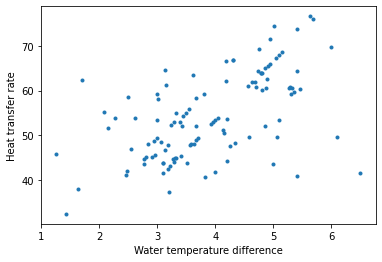

In [ ]:
plt.plot(gs_heat_pump['WTD'],gs_heat_pump['HTR'],'.')
plt.xlabel('Water temperature difference')
plt.ylabel('Heat transfer rate')

In [ ]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = gs_heat_pump['WTD'], y = gs_heat_pump['HTR'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5525522322827214
P-value:  2.6781382203733927e-10


---
# Referencias

* Bobadilla, J. (2021). Machine Learning y Deep Learning: Usando Python, Scikit y Keras. (1st ed.). Ediciones de la U.